#Linear Regression


In this notebook we will practice the basics of linear regression, a simple but powerful tool to find patterns in data. Linear regression helps us describe how one factor changes when another factor changes — for example, how the growth of a plant might relate to the amount of fertilizer or light it receives. We will start with the key ideas and definitions, and then work through examples so you can see how this method is applied in real plant pathology data.




Key Concepts of Linear Regression

*1-Independent Variable (X): The factor we think explains or
influences the outcome (e.g., fertilizer amount).

*2-Dependent Variable (Y): The outcome we want to predict or explain (e.g., plant height).

*3-Regression Line (ŷ): A straight line that best fits the data.

*4-Coefficients (β): Numbers showing how much Y changes when X changes by one unit.

*5-Residuals: Differences between the observed values and the predicted values.

*6-Mean Squared Error (MSE): Average of squared differences between actual and predicted values.
Smaller MSE = better fit.

*7-R² (Coefficient of Determination): A value between 0 and 1 showing how well X explains Y.
Closer to 1 = stronger fit.

*8-Gradient Descent: An optimization method to find the best line. It starts with a random line and adjusts it step by step to reduce error.

*9-Learning Rate: A number that controls how big each adjustment step is.
Too big → unstable, too small → very slow.

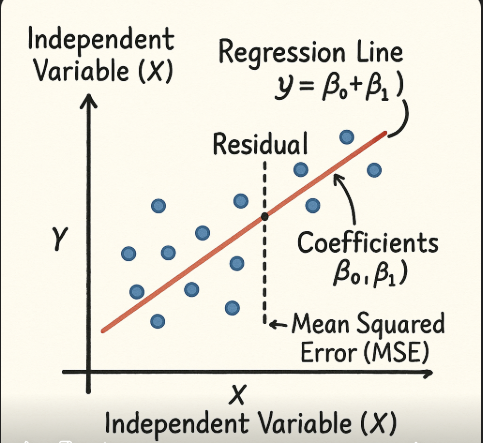

## Setup

This cell installs and imports required libraries and enables interactive widgets.


In [ ]:

# If running on Colab, ipywidgets should work out-of-the-box.
# In case widgets are not shown, you may need to run:
# !pip install ipywidgets
# from google.colab import output
# output.enable_custom_widget_manager()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Widgets
try:
    from ipywidgets import interact, interactive, FloatSlider, IntSlider, fixed
except Exception as e:
    print("ipywidgets not available; install with `pip install ipywidgets` if needed.")

# Modeling
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# 3D plotting
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401  (needed for 3D projection)

np.random.seed(42)
print("Setup complete.")


Setup complete.


## 1) Interactive intuition with synthetic data
Lets first generate synthetic data

Drag the sliders to change the line (slope, intercept) and **see MSE update live**.


interactive(children=(FloatSlider(value=2.0, description='slope', max=5.0, min=-5.0), FloatSlider(value=1.0, d…

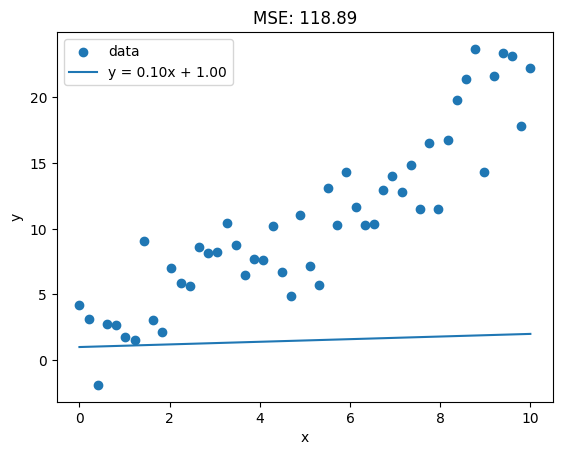

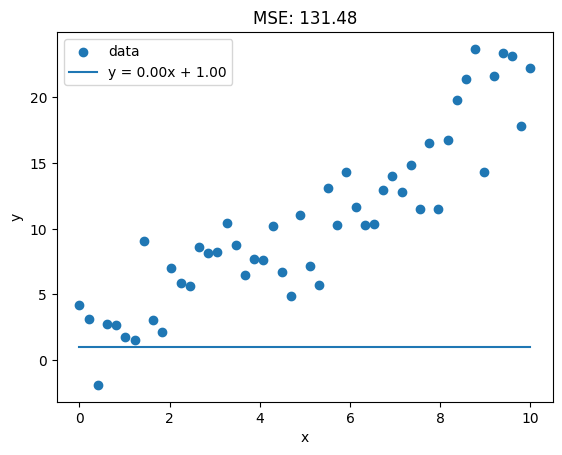

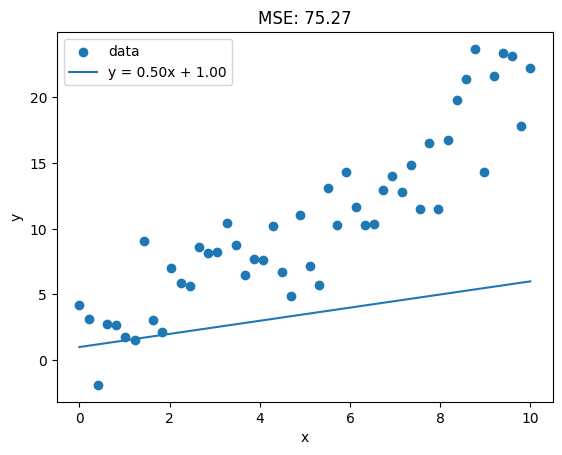

In [ ]:

# Generate synthetic data with noise
x = np.linspace(0, 10, 50)
y_true = 2.0 * x + 1.0
y = y_true + np.random.normal(0, 3, size=x.shape)

def plot_line(slope=2.0, intercept=1.0):
    plt.figure()
    plt.scatter(x, y, label="data")
    y_pred = slope * x + intercept
    plt.plot(x, y_pred, label=f"y = {slope:.2f}x + {intercept:.2f}")
    mse = np.mean((y - y_pred)**2)
    plt.title(f"MSE: {mse:.2f}")
    plt.legend()
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

try:
    interact(plot_line, slope=(-5.0, 5.0, 0.1), intercept=(-10.0, 10.0, 0.5));
except NameError:
    # Fallback non-interactive plot
    plot_line()


## Biology-themed example 1: Lesion length vs. bacterial load

We simulate a plausible plant pathology relation:
- **X = lesion length (cm)**
- **Y = log10(cfu/mL)** bacterial population

We fit linear regression, report **R²**, and inspect **residuals**.


Slope (per cm lesion): 0.3523170831336824
Intercept: 4.49789639350048
R^2 (test): 0.954595481459271
MSE   (test): 0.01493846023425926


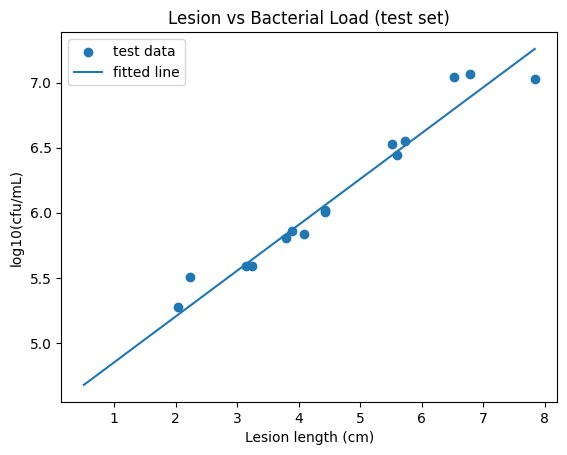

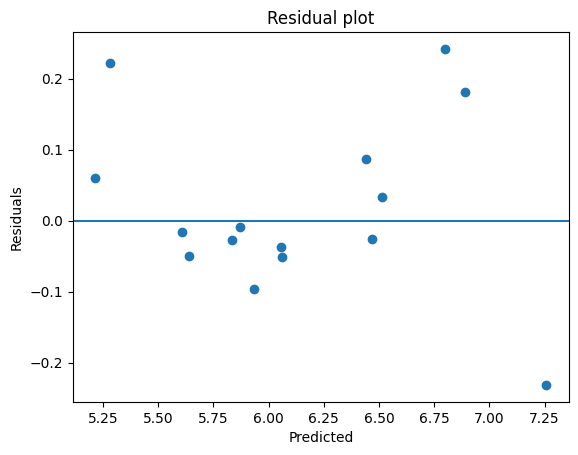

Saved dataset: rice_lesion_vs_cfu.csv


In [ ]:

# Create a small synthetic dataset
np.random.seed(7)
n = 60
lesion_cm = np.random.uniform(0.5, 8.0, size=n)
log10_cfu = 0.35 * lesion_cm + 4.5 + np.random.normal(0, 0.15, size=n)

df1 = pd.DataFrame({'lesion_cm': lesion_cm, 'log10_cfu_ml': log10_cfu})
df1.to_csv('rice_lesion_vs_cfu.csv', index=False)

X = df1[['lesion_cm']].values
y_bact = df1['log10_cfu_ml'].values

X_train, X_test, y_train, y_test = train_test_split(X, y_bact, test_size=0.25, random_state=0)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("Slope (per cm lesion):", float(lr.coef_[0]))
print("Intercept:", float(lr.intercept_))
print("R^2 (test):", r2_score(y_test, y_pred))
print("MSE   (test):", mean_squared_error(y_test, y_pred))

# Scatter + fitted line (over the test set range for display)
x_line = np.linspace(X.min(), X.max(), 100).reshape(-1,1)
y_line = lr.predict(x_line)

plt.figure()
plt.scatter(X_test, y_test, label="test data")
plt.plot(x_line, y_line, label="fitted line")
plt.xlabel("Lesion length (cm)")
plt.ylabel("log10(cfu/mL)")
plt.title("Lesion vs Bacterial Load (test set)")
plt.legend()
plt.show()

# Residuals
resid = y_test - y_pred
plt.figure()
plt.scatter(y_pred, resid)
plt.axhline(0)
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual plot")
plt.show()

print("Saved dataset: rice_lesion_vs_cfu.csv")



1- After running gradient descent, the algorithm reports 𝑅2 value of 0.85. What does this tell us about the fit of the model?

2- In the code, change the learning rate (lr) from 0.01 to 1.0. What happens to the MSE curve? Why does this happen?


3-Modify the number of steps (steps) in the gradient descent function. Run the code with steps = 50, steps = 300, and steps = 1000. How does the final regression line change, and what do you notice about the MSE?